<a href="https://colab.research.google.com/github/mandresblanco/tests_/blob/main/Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm  

This dataset contains information about advertising
budgets for TV and radio and corresponding sales numbers. What we want to learn here is how much those
budgets influence product sales.

In [50]:
df = pd.read_csv('/content/advertising.csv', index_col=0)

x = df.TV
y = df.Sales
x=sm.add_constant(x) #y = b0+b1*x

lr_model = sm.OLS(y,x).fit() #ordinary least squares

print(lr_model.summary())
print(lr_model.params)



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.47e-42
Time:                        12:35:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

R-squared value is around 0.61, which means that
about 61% of the variance in this TV–sales relationship can be explained using the model.

Text(0, 0.5, 'Sales')

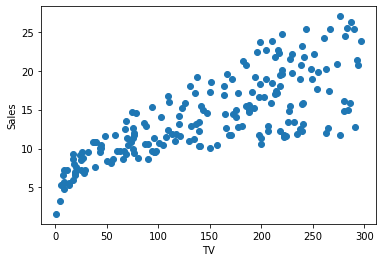

In [32]:
plt.figure()
plt.scatter(df.TV, y)
plt.xlabel('TV')
plt.ylabel('Sales')



In [33]:
df = pd.read_csv('/content/advertising.csv', index_col=0)

x = df.Radio
y = df.Sales
x=sm.add_constant(x) #y = b0+b1*x

lr_model = sm.OLS(y,x).fit() #ordinary least squares
print(lr_model.summary())
print(lr_model.params)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 10 May 2021   Prob (F-statistic):           4.35e-19
Time:                        12:19:32   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

R-squared value is around 0.33, which means that
about 33% of the variance in this Radio–sales relationship can be explained using the model.

Text(0, 0.5, 'Sales')

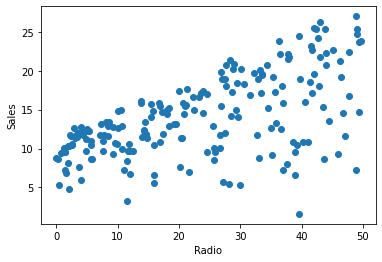

In [35]:
plt.figure()
plt.scatter(df.Radio, y)
plt.xlabel('Radio')
plt.ylabel('Sales')


In [56]:
x = df[['TV', 'Radio']]
y = df['Sales']
x = sm.add_constant(x)

lr_model = sm.OLS(y,x).fit()
print(lr_model.summary())
print(lr_model.params)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 10 May 2021   Prob (F-statistic):           4.83e-98
Time:                        12:50:41   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

Text(0.5, 0, 'Sales')

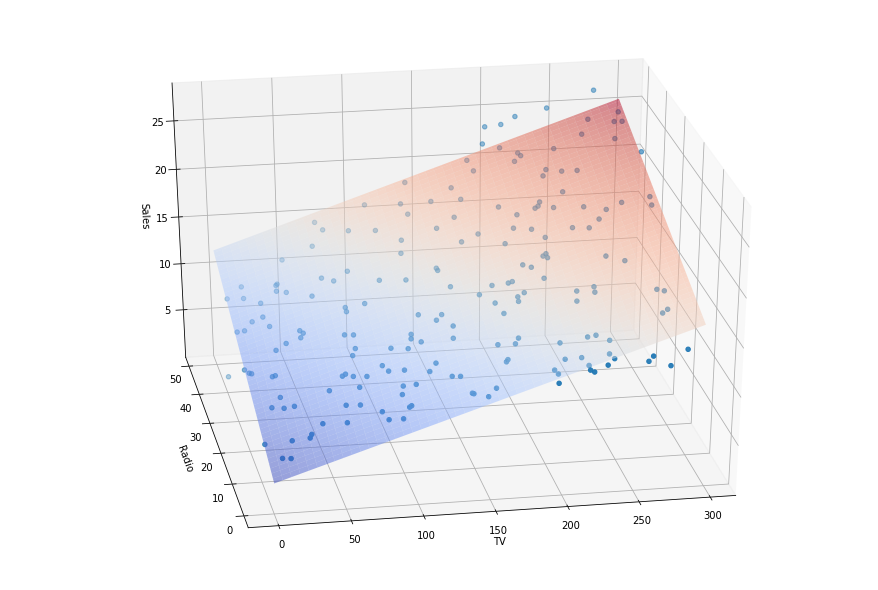

In [59]:
from mpl_toolkits.mplot3d import Axes3D

# Figure out X and Y axis using ranges from TV and Radio
X_axis, Y_axis = np.meshgrid(np.linspace(x.TV.min(), x.TV.max(), 100), np.linspace(x.Radio.min(), x.Radio.max(), 100))

# Plot the hyperplane by calculating corresponding Z axis(Sales)
Z_axis = lr_model.params[0] + lr_model.params[1] * X_axis + lr_model.params[2] * Y_axis

# Create matplotlib 3D axes
fig = plt.figure(figsize=(12, 8)) # figsize refers to width and height of the figure
ax = Axes3D(fig, azim=-100)

# Plot hyperplane
ax.plot_surface(X_axis, Y_axis, Z_axis, cmap=plt.cm.coolwarm, alpha=0.5, linewidth=0)
# Plot data points
ax.scatter(x.TV, x.Radio, y)
# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')


In [54]:
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
